# 量子线路高阶操作

[![下载Notebook](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/website-images/r2.7.0rc1/resource/_static/logo_notebook.svg)](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/notebook/r2.7.0rc1/mindquantum/zh_cn/beginner/mindspore_advanced_operations_of_quantum_circuit.ipynb)&emsp;
[![下载样例代码](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/website-images/r2.7.0rc1/resource/_static/logo_download_code.svg)](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/notebook/r2.7.0rc1/mindquantum/zh_cn/beginner/mindspore_advanced_operations_of_quantum_circuit.py)&emsp;
[![查看源文件](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/website-images/r2.7.0rc1/resource/_static/logo_source.svg)](https://gitee.com/mindspore/docs/blob/r2.7.0rc1/docs/mindquantum/docs/source_zh_cn/beginner/advanced_operations_of_quantum_circuit.ipynb)

在前面变分量子线路操作指导中介绍了[量子线路](https://mindspore.cn/mindquantum/docs/zh-CN/r0.11/beginner/parameterized_quantum_circuit.html#%E9%87%8F%E5%AD%90%E7%BA%BF%E8%B7%AF)的基本用法。接下来，我们将进一步探索MindSpore Quantum为量子线路定义的一些高阶操作的用法。

## [mindquantum.core.circuit.controlled](https://www.mindspore.cn/mindquantum/docs/zh-CN/r0.11/core/circuit/mindquantum.core.circuit.controlled.html)

[controlled](https://www.mindspore.cn/mindquantum/docs/zh-CN/r0.11/core/circuit/mindquantum.core.circuit.controlled.html) 方法用于对任意量子线路或量子算符添加控制量子比特（可以是多个）。

例如，我们构建一个仅包含两个量子比特的量子线路，并通过 [controlled](https://www.mindspore.cn/mindquantum/docs/zh-CN/r0.11/core/circuit/mindquantum.core.circuit.controlled.html) 方法对其添加一个控制量子比特——$q_2$：

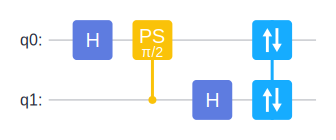

In [1]:
from mindquantum.algorithm.library import qft
from mindquantum.core.circuit import controlled

u1 = qft(range(2))  # 构建量子线路
u1.svg()

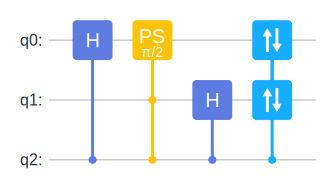

In [2]:
u2 = controlled(u1)(2)  # 对线路添加控制量子位q2，返回一个新的线路
u2.svg()

实际上，[controlled()](https://www.mindspore.cn/mindquantum/docs/zh-CN/r0.11/core/circuit/mindquantum.core.circuit.controlled.html) 返回的是一个函数。例如：

In [3]:
u3 = controlled(u1)

我们可通过调用u3来对初始线路u1添加控制量子位，和上面的效果是一样的：

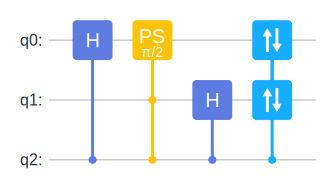

In [4]:
u4 = u3(2)
u4.svg()

注意：添加的控制量子比特不能是线路中已存在的某个门的目标量子比特，否则会报错！

另外，我们还可以对量子线路批量添加控制位。例如，在下面的示例中，我们对$q_0$和$q_1$分别添加控制位——$q_2$和$q_3$：

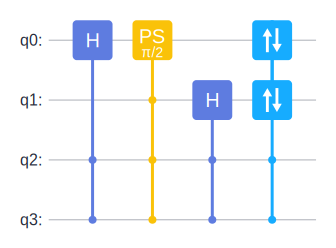

In [5]:
u = controlled(qft)
u = u([2, 3], [0, 1])  # 批量添加控制位
u.svg()

## [mindquantum.core.circuit.dagger](https://www.mindspore.cn/mindquantum/docs/zh-CN/r0.11/core/circuit/mindquantum.core.circuit.dagger.html)

[dagger](https://www.mindspore.cn/mindquantum/docs/zh-CN/r0.11/core/circuit/mindquantum.core.circuit.dagger.html) 方法用于求量子线路或量子算符的厄米共轭。

以下示例提供了两种进行 [dagger](https://www.mindspore.cn/mindquantum/docs/zh-CN/r0.11/core/circuit/mindquantum.core.circuit.dagger.html) 操作的方式：

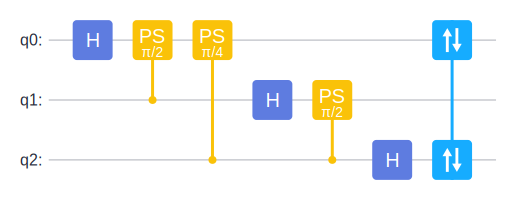

In [6]:
from mindquantum.core.circuit import dagger

u1 = qft(range(3))
u1.svg()

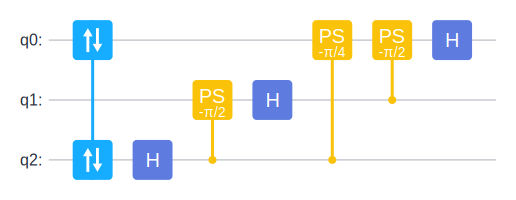

In [7]:
u2 = dagger(u1)
u2.svg()

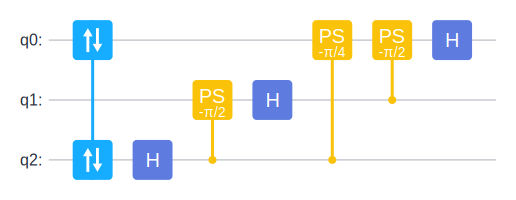

In [8]:
u3 = dagger(qft)
u4 = u3(range(3))
u4.svg()

可看到，两种方式得到的线路是相同的。

## [mindquantum.core.circuit.apply](https://www.mindspore.cn/mindquantum/docs/zh-CN/r0.11/core/circuit/mindquantum.core.circuit.apply.html)

[apply](https://www.mindspore.cn/mindquantum/docs/zh-CN/r0.11/core/circuit/mindquantum.core.circuit.apply.html) 方法用于将量子线路或量子算符作用在指定的量子比特（可以是多个）上。

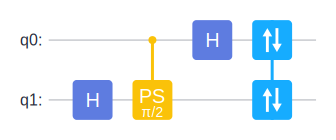

In [9]:
from mindquantum.core.circuit import apply

u1 = qft([0, 1])
circuit1 = apply(u1, [1, 0])  # 将量子线路u1作用在比特q1, q0上
circuit1.svg()

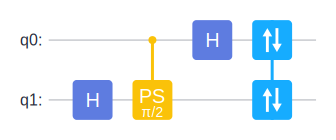

In [10]:
u2 = apply(qft, [1, 0])  # 将qft作用在比特q0、q1上
circuit2 = u2([0, 1])
circuit2.svg()

## [mindquantum.core.circuit.add_prefix](https://www.mindspore.cn/mindquantum/docs/zh-CN/r0.11/core/circuit/mindquantum.core.circuit.add_prefix.html)

[add_prefix](https://www.mindspore.cn/mindquantum/docs/zh-CN/r0.11/core/circuit/mindquantum.core.circuit.add_prefix.html) 方法用于在参数化量子电路或参数化量子算符的参数名上加上前缀。这在神经网络分层中十分有用，例如：

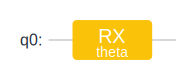

In [11]:
from mindquantum.core.circuit import add_prefix, Circuit
from mindquantum.core.gates import RX, H

circ = Circuit().rx("theta", 0)
circ.svg()

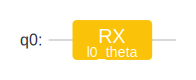

In [12]:
circ = add_prefix(circ, 'l0')  # 添加后，参数"theta"就变成了"l0_theta"
circ.svg()

我们可以在含参量子门作用于具体的量子比特后对其参数名称添加前缀，也可以在其还未应用于量子比特的时候添加。例如：

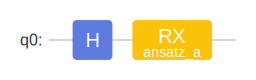

In [13]:
u = lambda qubit: Circuit([H.on(0), RX('a').on(qubit)])

u1 = u(0)
u1 = add_prefix(u1, 'ansatz')
u1.svg()

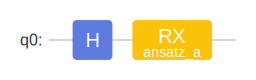

In [14]:

u2 = add_prefix(u, 'ansatz')
u2 = u2(0)
u2.svg()

## [mindquantum.core.circuit.change_param_name](https://www.mindspore.cn/mindquantum/docs/zh-CN/r0.11/core/circuit/mindquantum.core.circuit.change_param_name.html)

[change_param_name](https://www.mindspore.cn/mindquantum/docs/zh-CN/r0.11/core/circuit/mindquantum.core.circuit.change_param_name.html) 方法用于修改参数化量子电路或参数化量子算符的参数名。

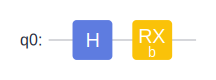

In [15]:
from mindquantum.core.circuit import change_param_name, Circuit
from mindquantum.core.gates import RX, H

u = lambda qubit: Circuit([H.on(0), RX('a').on(qubit)])

u1 = u(0)
u1 = change_param_name(u1, {'a': 'b'})
u1.svg()

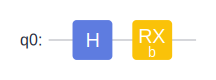

In [16]:
u2 = change_param_name(u, {'a': 'b'})
u2 = u2(0)
u2.svg()

## [mindquantum.core.circuit.UN](https://www.mindspore.cn/mindquantum/docs/zh-CN/r0.11/core/circuit/mindquantum.core.circuit.UN.html)

[UN](https://www.mindspore.cn/mindquantum/docs/zh-CN/r0.11/core/circuit/mindquantum.core.circuit.UN.html) 模块用于将量子门作用于不同的目标量子比特和控制量子比特。

一般格式如下：`mindquantum.circuit.UN(gate, maps_obj, maps_ctrl=None)`，参数`gate`是要执行的量子门，`maps_obj`是需要执行该量子门的目标量子比特，`maps_ctrl`是控制量子比特（无控制量子位时为`None`）。若每个量子比特位都执行同一不含参的量子门，则可以直接使用`UN(gate, N)`，`N`表示量子比特个数。

以下是一个简单的示例，我们在构建的线路中对每一位量子比特都应用一个 [H](https://www.mindspore.cn/mindquantum/docs/zh-CN/r0.11/core/gates/mindquantum.core.gates.HGate.html) 门：

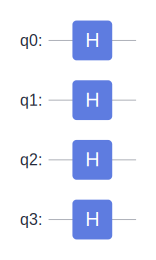

In [17]:
from mindquantum.core.circuit import change_param_name, Circuit, UN
from mindquantum.core.gates import X, H, SWAP

circuit1 = Circuit()
circuit1 += UN(H, 4)  # 将H门作用在每一位量子比特上
circuit1.svg()

以下示例中，我们对量子比特$q_2$和$q_0$、$q_3$和$q_1$分别添加一个[CNOT](https://www.mindspore.cn/mindquantum/docs/zh-CN/r0.11/core/gates/mindquantum.core.gates.XGate.html)门，其中$q_2$为控制位，$q_0$为目标位；$q_3$为控制位，$q_1$为目标位：

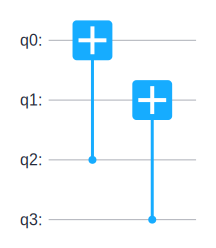

In [18]:
circuit2 = UN(X, maps_obj=[0, 1], maps_ctrl=[2, 3])
circuit2.svg()

针对类似 [SWAP](https://www.mindspore.cn/mindquantum/docs/zh-CN/r0.11/core/gates/mindquantum.core.gates.SWAPGate.html) 门的用法如下：

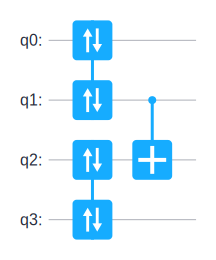

In [19]:
circuit3 = UN(SWAP, maps_obj=[[0, 1], [2, 3]]).x(2, 1)
circuit3.svg()

## [mindquantum.core.circuit.shift](https://www.mindspore.cn/mindquantum/docs/zh-CN/r0.11/core/circuit/mindquantum.core.circuit.shift.html)

[shift](https://www.mindspore.cn/mindquantum/docs/zh-CN/r0.11/core/circuit/mindquantum.core.circuit.shift.html) 方法用于修改给定线路的量子位范围，参数为要挪动的步长。注意，步长不能为负数。并且，只能挪到最后一个量子比特，不能循环到$q_0$（第一个量子位）。

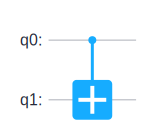

In [20]:
from mindquantum.core.circuit import shift, Circuit
from mindquantum.core.gates import X

circ = Circuit().x(1, 0)
circ.svg()

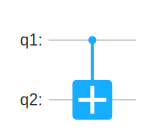

In [21]:
circ = shift(circ, 1)
circ.svg()  # 线路作用的量子比特从q0、q1变为q1、q2

### 案例——鸢尾花分类：搭建Encoder

以上高阶操作的示例显示了量子线路高阶操作的适用性及便捷性，如果我们进一步将它们组合起来用于构建量子线路，又会产生什么神奇魔力呢？

接下来我们将以<a href="https://www.mindspore.cn/mindquantum/docs/zh-CN/r0.11/case_library/classification_of_iris_by_qnn.html#%E9%80%9A%E8%BF%87%E9%87%8F%E5%AD%90%E7%A5%9E%E7%BB%8F%E7%BD%91%E7%BB%9C%E5%AF%B9%E9%B8%A2%E5%B0%BE%E8%8A%B1%E8%BF%9B%E8%A1%8C%E5%88%86%E7%B1%BB" target="_blank"> 通过量子神经网络对鸢尾花进行分类
 </a>的案例中<a href="https://mindspore.cn/mindquantum/docs/zh-CN/r0.11/case_library/classification_of_iris_by_qnn.html#%E6%90%AD%E5%BB%BAencoder" target="_blank"> 搭建Encoder </a>部分为例，搭建下图所示的量子线路：

![encoder classification of iris by qnn](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/website-images/r2.7.0rc1/docs/mindquantum/docs/source_zh_cn/images/encoder_classification_of_iris_by_qnn.png)


In [22]:
from mindquantum.core.circuit import shift, add_prefix, Circuit, UN
from mindquantum.core.gates import RZ, X, H

template = Circuit([X.on(1, 0), RZ('alpha').on(1), X.on(1, 0)])
encoder = UN(H, 4) + (RZ(f'{i}_alpha').on(i) for i in range(4)) + sum(add_prefix(shift(template, i), f'{i+4}') for i in range(3))
encoder.summary()

                                    Circuit Summary                                     
╭──────────────────────┬───────────────────────────────────────────────────────────────╮
│ Info                 │ value                                                         │
├──────────────────────┼───────────────────────────────────────────────────────────────┤
│ Number of qubit      │ 4                                                             │
├──────────────────────┼───────────────────────────────────────────────────────────────┤
│ Total number of gate │ 17                                                            │
│ Barrier              │ 0                                                             │
│ Noise Channel        │ 0                                                             │
│ Measurement          │ 0                                                             │
├──────────────────────┼───────────────────────────────────────────────────────────────┤
│ Parameter gate       │ 7                                                             │
│ 7 ansatz parameters  │ 0_alpha, 1_alpha, 2_alpha, 3_alpha, 4_alpha, 5_alpha, 6_alpha │
╰──────────────────────┴───────────────────────────────────────────────────────────────╯

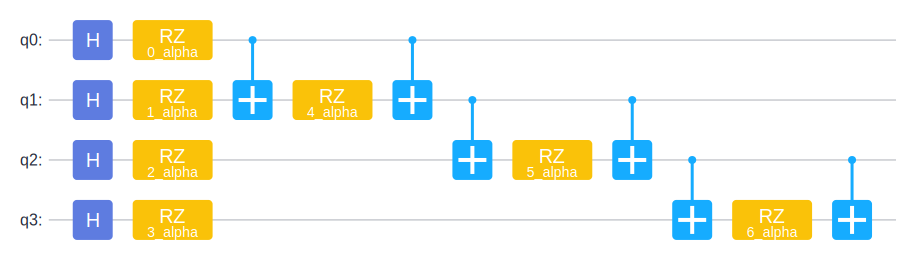

In [23]:
encoder.svg()

在上面的代码中，我们使用UN模块将不含参数的H门作用于目标量子比特$q_0$~$q_3$，然后将RZ(i_alpha)门作用于第i位量子比特。
接着，观察到线路中有三个一样的模块，它们都由一个受控X门、一个RZ门和一个受控X门构成，因此，我们构造对应的模板template，它由一个受$q_0$控制、作用在$q_1$的X门，一个作用在$q_1$的RZ门和一个受$q_0$控制、作用在$q_1$的X门构成。然后我们通过shift(template, i)来改变模板作用的量子比特范围，构建三个结构相同但作用的量子比特范围相差1的模块，其涉及的量子比特范围分别为$q_0$和$q_1$、$q_1$和$q_2$、$q_2$和$q_3$。
最后，我们使用add_prefix方法为通过shift构造的所有含参量子门的参数名加上一个数字前缀。

至此，通过MindSpore Quantum提供的这些量子线路高阶操作，我们仅用两行代码就构建了所需的Encoder！

In [24]:
from mindquantum.utils.show_info import InfoTable

InfoTable('mindquantum', 'scipy', 'numpy')
